## Stage 01: Problem Framing & Scoping

**Goal:** Enable individual investors to analyze and predict AAPL stock trends for 2023 using open data and reproducible analytics.

**Data Dictionary:**
- Date: Trading day
- Open: Opening price
- High: Highest price
- Low: Lowest price
- Close: Closing price
- Adj Close: Adjusted closing price
- Volume: Trading volume

**Methodology:**
- Acquire daily OHLCV data for AAPL (2023)
- Clean, analyze, and model the data for trend detection and prediction

## Stage02: tooling_setup
### Environment & Path Setup

In [13]:

import os
import sys

src_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# .env & .gitignore check
print("Checking for .env.example and .gitignore...")
print(".env.example exists:", os.path.exists("../.env.example"))
print(".gitignore exists:", os.path.exists("../.gitignore"))

Checking for .env.example and .gitignore...
.env.example exists: False
.gitignore exists: True


## Stage03: python_fundamentals
- Utility Function Demo

In [14]:
import pandas as pd
import sys
import os
from datetime import datetime

# Add src directory to Python path
src_path = os.path.abspath(os.path.abspath(os.path.join(os.getcwd(), "../src")))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import the utility function
try:
    from utils import parse_date_column
    print("Successfully imported parse_date_column from utils")
except ImportError as e:
    print(f"Import error: {e}")
    # Create enhanced function for demonstration
    def parse_date_column(df, column, date_format=None):
        """
        Parse a column in a DataFrame to datetime with enhanced error handling.
        Args:
            df (pd.DataFrame): Input DataFrame
            column (str): Column name to parse
            date_format (str, optional): Custom date format
        Returns:
            pd.DataFrame: DataFrame with parsed date column
        """
        df = df.copy()
        # Try parsing with specified format first
        if date_format:
            df[column] = pd.to_datetime(df[column], format=date_format, errors='coerce')
        else:
            # Try multiple common date formats
            df[column] = pd.to_datetime(df[column], errors='coerce')
            
            # If coercion resulted in NaT values, try inferring format
            if df[column].isna().any():
                print(f"Warning: Some values in '{column}' could not be parsed with default method")
                
        return df

print()

# Create example DataFrame with various date formats
df = pd.DataFrame({
    'date_str1': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'date_str2': ['01/01/2023', '02/01/2023', '03/01/2023'],  # Month/Day/Year format
    'date_str3': ['2023-01-01 10:30:00', '2023-01-02 14:45:00', '2023-01-03 09:15:00'],
    'numeric_value': [100, 200, 300]
})

print("Original DataFrame:")
print(df)
print("\nOriginal dtypes:")
print(df.dtypes)
print()

# Parse all date columns with appropriate formats
df = parse_date_column(df, 'date_str1')  # ISO format (YYYY-MM-DD)
df = parse_date_column(df, 'date_str2', '%m/%d/%Y')  # Month/Day/Year format
df = parse_date_column(df, 'date_str3')  # ISO format with time

print("After parsing all date columns:")
print(df)
print("\nUpdated dtypes:")
print(df.dtypes)
print()

# Check for any parsing errors
date_columns = ['date_str1', 'date_str2', 'date_str3']
for col in date_columns:
    null_count = df[col].isna().sum()
    if null_count > 0:
        print(f"Warning: {null_count} null values found in '{col}' after parsing")

print()

# Show additional datetime operations
print("Additional datetime operations:")
for col in date_columns:
    if pd.api.types.is_datetime64_any_dtype(df[col]):
        print(f"Column '{col}':")
        print(f"  Earliest date: {df[col].min()}")
        print(f"  Latest date: {df[col].max()}")
        print(f"  Day of week for first date: {df[col].iloc[0].strftime('%A')}")
        print()

Successfully imported parse_date_column from utils

Original DataFrame:
    date_str1   date_str2            date_str3  numeric_value
0  2023-01-01  01/01/2023  2023-01-01 10:30:00            100
1  2023-01-02  02/01/2023  2023-01-02 14:45:00            200
2  2023-01-03  03/01/2023  2023-01-03 09:15:00            300

Original dtypes:
date_str1        object
date_str2        object
date_str3        object
numeric_value     int64
dtype: object

After parsing all date columns:
   date_str1  date_str2           date_str3  numeric_value
0 2023-01-01 2023-01-01 2023-01-01 10:30:00            100
1 2023-01-02 2023-02-01 2023-01-02 14:45:00            200
2 2023-01-03 2023-03-01 2023-01-03 09:15:00            300

Updated dtypes:
date_str1        datetime64[ns]
date_str2        datetime64[ns]
date_str3        datetime64[ns]
numeric_value             int64
dtype: object


Additional datetime operations:
Column 'date_str1':
  Earliest date: 2023-01-01 00:00:00
  Latest date: 2023-01-03 00:00:0

## Stage04: Data Acquisition and Ingestion

In [15]:
# yfinance Collector with Error Handling
import os
import sys
src_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)
from acquisition import fetch_stock_data

ticker = "AAPL"
start = "2023-01-01"
end = "2023-12-31"
raw_path = "../data/raw/aapl_2023.csv"

try:
    df_raw = fetch_stock_data(ticker, start, end, raw_path)
    print("Data fetched successfully. Shape:", df_raw.shape)
except Exception as e:
    print(f"Error fetching data: {e}")

/Users/yuqingyan/Desktop/bootcamp_Yuqing_Yan/project/src/acquisition.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Data fetched successfully. Shape: (250, 5)


## Stage05: Data Storage

In [16]:
# Data Storage Check
import os

print("Raw data exists:", os.path.exists("../data/raw/aapl_2023.csv"))
print("Processed data folder exists:", os.path.exists("../data/processed/"))

Raw data exists: True
Processed data folder exists: True


## Stage06: Data Cleaning & Preprocessing
> Why drop columns before filling?
> Dropping columns with excessive missingness (>50%) ensures we don’t impute too much, which could introduce bias or noise. Only after this do we fill remaining missing values, preserving as much real data as possible.
>
> Tradeoff:
> Dropping columns may lose potentially useful information, but filling too many missing values can distort the data distribution. This approach balances data integrity and completeness.
>
> Comparison:
> We compare missing value counts and distributions before and after each step to ensure transparency and to understand the impact of our cleaning choices.

In [17]:
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure src is in the path
src_path = os.path.abspath(os.path.join(os.getcwd(), "../src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)
from utils import parse_date_column
from cleaning import fill_missing_median, drop_missing, normalize_data

raw_path = "../data/raw/aapl_2023.csv"
header = pd.read_csv(raw_path, nrows=1)
colnames = header.columns.tolist()

df = pd.read_csv(raw_path, skiprows=3, header=None, names=colnames)
df = df.rename(columns={"Price": "date"})

df.head()

,date,Close,High,Low,Open,Volume
0,2023-01-03,123.330650,129.079567,122.443165,128.468194,112117500
1,2023-01-04,124.602699,126.870716,123.340502,125.125327,89113600
2,2023-01-05,123.281342,125.993097,123.024963,125.361998,80962700
3,2023-01-06,127.817352,128.478033,123.153137,124.257564,87754700
4,2023-01-09,128.339966,131.554638,128.083587,128.655523,70790800


In [18]:
df = parse_date_column(df, "date")
df = df.set_index("date")

print(df.head())
print(df.dtypes)

                 Close        High         Low        Open     Volume
date                                                                 
2023-01-03  123.330650  129.079567  122.443165  128.468194  112117500
2023-01-04  124.602699  126.870716  123.340502  125.125327   89113600
2023-01-05  123.281342  125.993097  123.024963  125.361998   80962700
2023-01-06  127.817352  128.478033  123.153137  124.257564   87754700
2023-01-09  128.339966  131.554638  128.083587  128.655523   70790800
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


Missing values before cleaning:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Columns after dropping those with >50% missing values:
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

Missing values after dropping columns:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Missing values after median filling:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


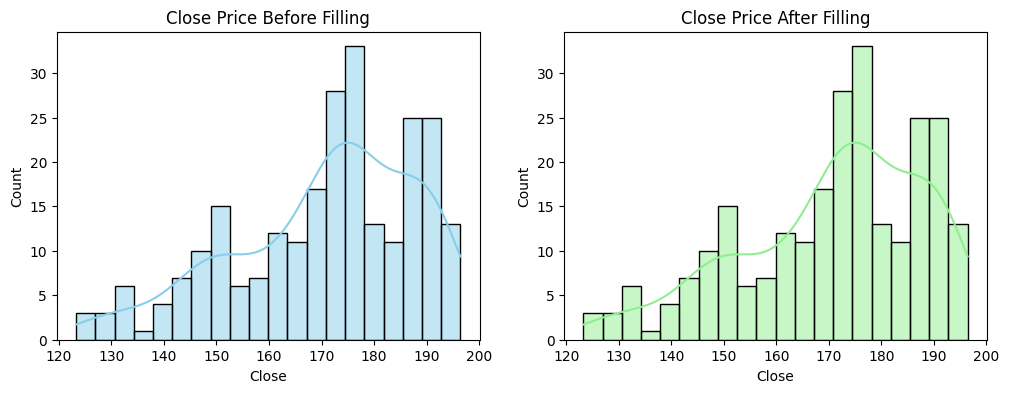


Cleaned data saved. Shape: (250, 5)


In [19]:
num_cols = ["Open", "High", "Low", "Close", "Volume"]

# 1. Show missing values before any cleaning
print("Missing values before cleaning:")
print(df[num_cols].isnull().sum())

# 2. Drop columns with too many missing values first
df_dropped = drop_missing(df, threshold=0.5)
print("\nColumns after dropping those with >50% missing values:")
print(df_dropped.columns)

# 3. Show missing values after dropping columns
print("\nMissing values after dropping columns:")
print(df_dropped[num_cols].isnull().sum())

# 4. Fill missing values with median
df_filled = fill_missing_median(df_dropped, num_cols)
print("\nMissing values after median filling:")
print(df_filled[num_cols].isnull().sum())

# 5. Visual comparison: distribution before and after filling
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df_dropped["Close"], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Close Price Before Filling")
sns.histplot(df_filled["Close"], bins=20, kde=True, ax=axes[1], color="lightgreen")
axes[1].set_title("Close Price After Filling")
plt.show()

# 6. Normalize data
df_clean = normalize_data(df_filled, num_cols)
df_clean.to_csv("../data/processed/aapl_2023_cleaned.csv", index=True)
print("\nCleaned data saved. Shape:", df_clean.shape)

In [20]:
df_clean.head()

,Close,High,Low,Open,Volume
date,,,,,
2023-01-03,0.000674,0.042897,0.000000,0.058400,0.675849
2023-01-04,0.018060,0.012197,0.012309,0.012036,0.499315
2023-01-05,0.000000,0.000000,0.007980,0.015318,0.436765
2023-01-06,0.061997,0.034536,0.009739,0.000000,0.488887
2023-01-09,0.069139,0.077296,0.077369,0.060998,0.358705


## Stage07: Outlier Detection & Analysis
> Why handle outliers?
> Outliers can skew statistical analysis and model training. We use the IQR method to flag and remove extreme values, which helps ensure our analysis reflects the typical behavior of the stock.
>
> Tradeoff:
> Removing outliers may discard rare but real events (e.g., market shocks). However, for most modeling and trend analysis, focusing on the bulk of the data yields more robust results.
>
> Comparison:
> We visualize the data before and after outlier removal to confirm the effect and to document any major changes in distribution.


         date     Close      High       Low      Open    Volume
0  2023-01-03  0.000674  0.042897  0.000000  0.058400  0.675849
1  2023-01-04  0.018060  0.012197  0.012309  0.012036  0.499315
2  2023-01-05  0.000000  0.000000  0.007980  0.015318  0.436765
3  2023-01-06  0.061997  0.034536  0.009739  0.000000  0.488887
4  2023-01-09  0.069139  0.077296  0.077369  0.060998  0.358705


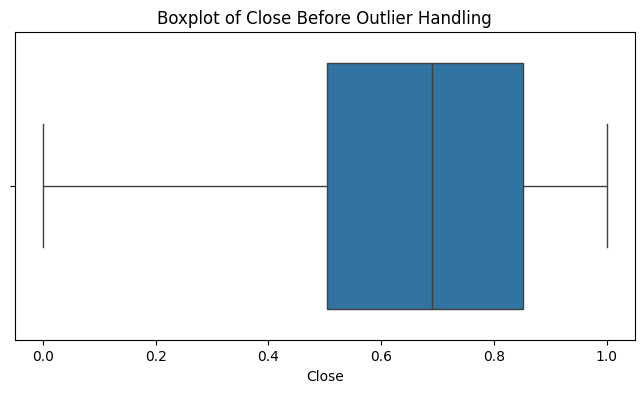

Number of outliers in Close before handling: 0


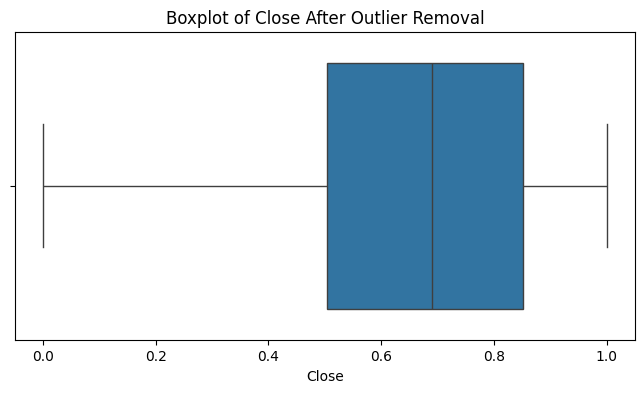

Shape before outlier removal: (250, 6)
Shape after outlier removal: (250, 6)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/aapl_2023_cleaned.csv")
print(df.head())
col = "Close"

# 1. Visualize outliers before handling
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[col])
plt.title(f"Boxplot of {col} Before Outlier Handling")
plt.show()

# 2. Detect outliers using IQR
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df[col] < lower) | (df[col] > upper)]
print(f"Number of outliers in {col} before handling:", outliers.shape[0])

# 3. Remove outliers
df_no_outliers = df[(df[col] >= lower) & (df[col] <= upper)]

# 4. Visualize after outlier removal
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_no_outliers[col])
plt.title(f"Boxplot of {col} After Outlier Removal")
plt.show()

print(f"Shape before outlier removal: {df.shape}")
print(f"Shape after outlier removal: {df_no_outliers.shape}")